In [1]:
from networkx import nx

In [2]:
g = nx.read_weighted_edgelist('cbdb_data.txt')

In [3]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
print(degree_sequence)

[1119, 522, 498, 485, 441, 433, 427, 421, 394, 384, 371, 338, 334, 332, 319, 306, 303, 296, 295, 282, 265, 254, 254, 254, 253, 247, 246, 243, 232, 214, 213, 211, 208, 200, 192, 189, 188, 188, 186, 183, 180, 175, 174, 167, 163, 158, 157, 157, 157, 157, 154, 154, 148, 148, 146, 145, 144, 143, 143, 141, 138, 135, 134, 134, 132, 132, 131, 128, 128, 128, 126, 125, 124, 124, 124, 124, 124, 123, 123, 121, 121, 120, 119, 118, 117, 116, 116, 115, 115, 114, 114, 114, 113, 111, 111, 111, 110, 110, 110, 110, 110, 109, 109, 108, 107, 107, 107, 106, 105, 105, 104, 103, 103, 103, 100, 98, 97, 97, 97, 97, 97, 96, 96, 96, 95, 95, 94, 93, 90, 90, 90, 89, 88, 87, 87, 87, 86, 86, 86, 84, 83, 83, 82, 81, 81, 81, 81, 81, 80, 80, 79, 79, 79, 79, 78, 77, 77, 77, 77, 76, 76, 75, 75, 75, 74, 74, 74, 74, 74, 73, 73, 72, 72, 71, 71, 71, 71, 70, 70, 70, 70, 70, 69, 68, 67, 67, 67, 66, 66, 66, 66, 65, 65, 65, 65, 64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 62, 62, 62, 62, 61,

In [4]:
import numpy as np
def gini(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()
    rmad = mad/np.mean(x)
    g = 0.5 * rmad
    return g

In [5]:
gini(degree_sequence)


0.6360184038261523

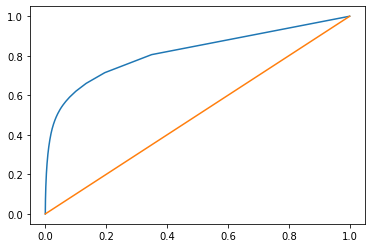

In [6]:
# ref: https://gist.github.com/CMCDragonkai/c79b9a0883e31b327c88bfadb8b06fc4

import numpy as np
import matplotlib.pyplot as plt


def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

arr = np.array(degree_sequence)
lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()